In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('bmh')

In [2]:
df = pd.read_csv('tweets.csv')
df.head()

,date,content,like_count,retweet_count,username,verified
0,2022-05-21 16:12:26+00:00,Paleo breakfast two over easy eggs+ bologna sa...,0,0,vibeman49,False
1,2022-05-21 16:06:30+00:00,Our Bitter Cacao Sourdough Bread - bitter Cioc...,1,0,fornocultura,False
2,2022-05-21 16:01:40+00:00,Today is the last day for Marvelous Marble #Of...,0,0,icingonthecpcke,False
3,2022-05-21 16:00:49+00:00,"For years, the chocolate industry has not suff...",2,0,FoodIsPower,False
4,2022-05-21 15:56:39+00:00,Dark chocolate or milk chocolate? #chocolate,1,0,CandleQueenUS,False


In [3]:
like_counts = df.like_count.value_counts()
like_counts

0      2589
1       918
2       454
3       268
4       175
       ... 
748       1
39        1
142       1
88        1
158       1
Name: like_count, Length: 81, dtype: int64

In [4]:
retweet_counts = df.retweet_count.value_counts()
retweet_counts

0      3913
1       627
2       198
3        90
4        44
5        28
6        16
7        16
8        14
11        9
9         7
10        7
15        3
12        2
36        2
18        2
46        2
23        2
13        2
158       1
82        1
30        1
22        1
253       1
48        1
29        1
14        1
19        1
20        1
127       1
38        1
72        1
27        1
33        1
35        1
Name: retweet_count, dtype: int64

In [5]:
username_counts = df.username.value_counts()
username_counts

40dollarbutton     100
AuroChocolate       84
buy1_best           78
isrgrajan           70
chocomasse          56
                  ... 
HealthSite4U         1
Laura_R_Leeson       1
ladyzai              1
artinchocolate       1
AuthorSethCohen      1
Name: username, Length: 2869, dtype: int64

In [6]:
verified_counts = df.verified.value_counts()
verified_counts

False    4916
True       84
Name: verified, dtype: int64

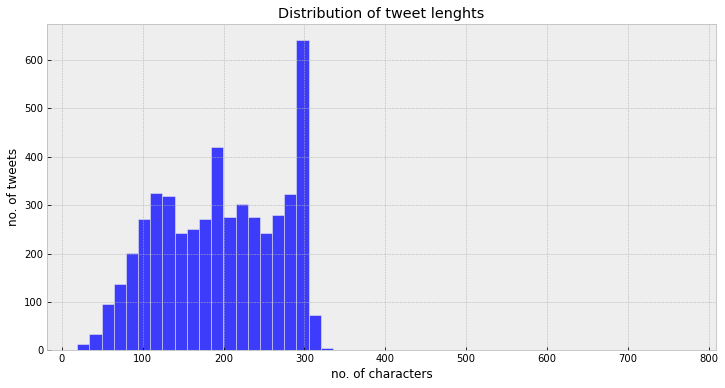

In [7]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of tweet lenghts')
plt.xlabel('no. of characters')
plt.ylabel('no. of tweets')
sns.histplot(df.content.str.len(), bins=50)
plt.show()

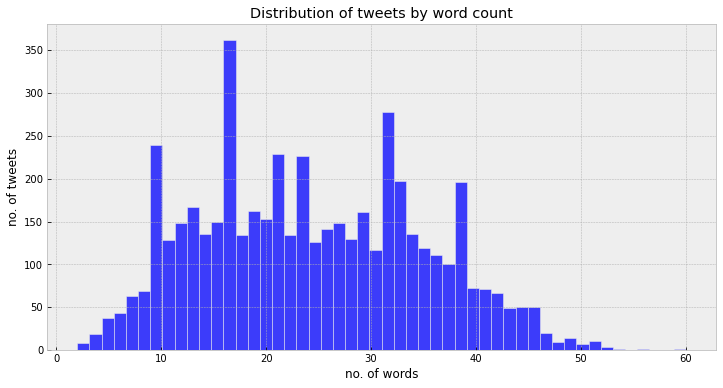

In [8]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of tweets by word count')
plt.xlabel('no. of words')
plt.ylabel('no. of tweets')
sns.histplot(df.content.str.split().map(lambda x: len(x)), bins=50)
plt.show()

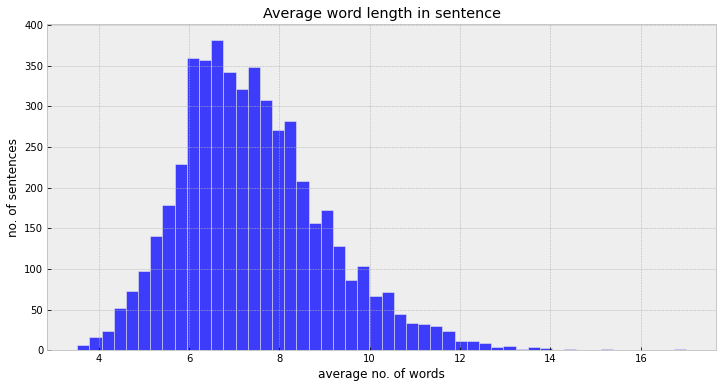

In [9]:
plt.figure(figsize=(12, 6))
plt.title('Average word length in sentence')
plt.xlabel('average no. of words')
plt.ylabel('no. of sentences')
sns.histplot(df.content.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)), bins=50)
plt.show()

<BarContainer object of 10 artists>

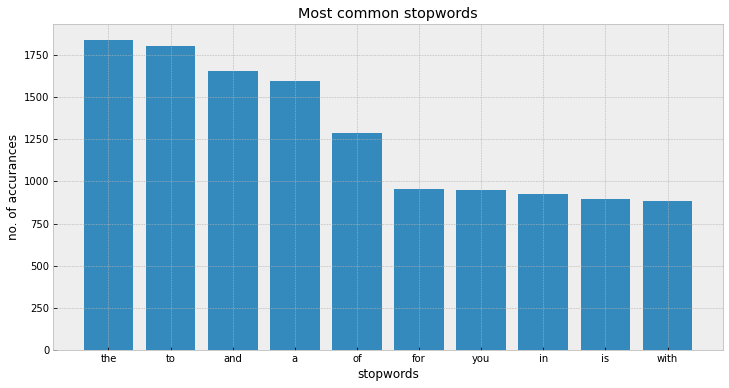

In [10]:
from nltk.corpus import stopwords
import collections

stop=set(stopwords.words('english'))
    
new=df.content.str.split().values.tolist()
corpus = [word for i in new for word in i]
dic = collections.defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
            
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.figure(figsize=(12, 6))
plt.title('Most common stopwords')
plt.xlabel('stopwords')
plt.ylabel('no. of accurances')
plt.bar(x,y)
    

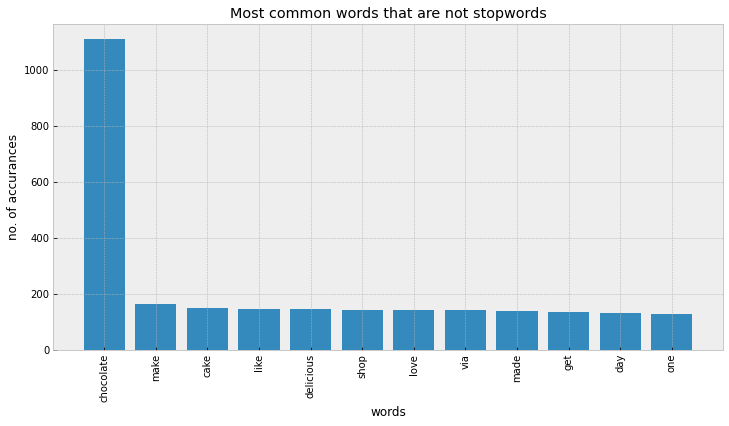

In [11]:
counter=collections.Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:80]:
    word = word.lower()
    if (word not in stop and word.isalpha()):
        x.append(word)
        y.append(count)

plt.figure(figsize=(12, 6))        
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title('Most common words that are not stopwords')
plt.xlabel('words')
plt.ylabel('no. of accurances')
plt.show()

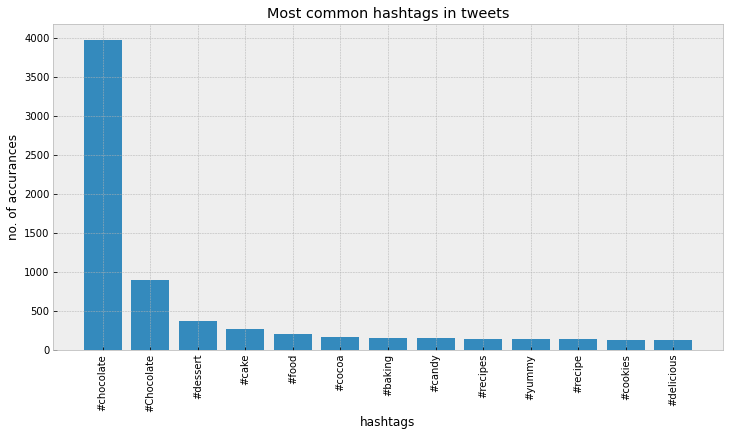

In [12]:
counter=collections.Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:80]:
    if (word.startswith('#')):
        x.append(word)
        y.append(count)

plt.figure(figsize=(12, 6))        
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title('Most common hashtags in tweets')
plt.xlabel('hashtags')
plt.ylabel('no. of accurances')
plt.show()

In [19]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [33]:
positive = 0
negative = 0
for content in df.content:
    analysis = TextBlob(content)
    if analysis.sentiment.polarity >= 0:
        positive = positive + 1
    else:
        negative = negative + 1
    

print("pos:" + str(positive) + "\nneg:" + str(negative))

pos:4478
neg:522


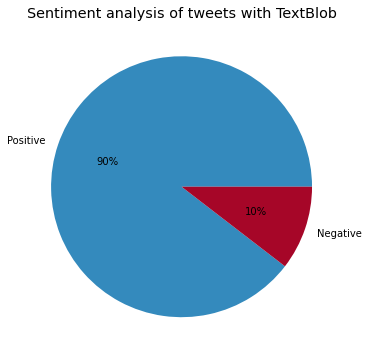

In [35]:
labels = 'Positive', 'Negative'
sentiment = [positive, negative]
plt.figure(figsize=(6, 6))
plt.title('Sentiment analysis of tweets with TextBlob')
plt.pie(sentiment, labels=labels, autopct='%.0f%%')
plt.show()

In [38]:
positive = 0
negative = 0
neutral = 0
for content in df.content:
    analysis = TextBlob(content)
    if analysis.sentiment.polarity >= 1/3:
        positive = positive + 1
    elif analysis.sentiment.polarity <= -1/3:
        negative = negative + 1
    else:
        neutral = neutral + 1

print("pos:" + str(positive) + "\nneg:" + str(negative) + "\nneu:" + str(neutral))

pos:1863
neg:166
neu:2971


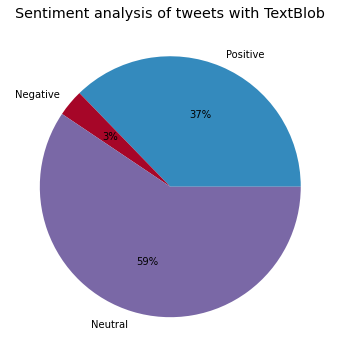

In [39]:
labels = 'Positive', 'Negative', 'Neutral'
sentiment = [positive, negative, neutral]
plt.figure(figsize=(6, 6))
plt.title('Sentiment analysis of tweets with TextBlob')
plt.pie(sentiment, labels=labels, autopct='%.0f%%')
plt.show()

In [49]:
analyzer = SentimentIntensityAnalyzer()

positive = 0
negative = 0
for content in df.content:
    analysis = analyzer.polarity_scores(content)
    
    if analysis['compound'] >= 0:
        positive = positive + 1
    else:
        negative = negative + 1

print("pos:" + str(positive) + "\nneg:" + str(negative))

pos:4649
neg:351


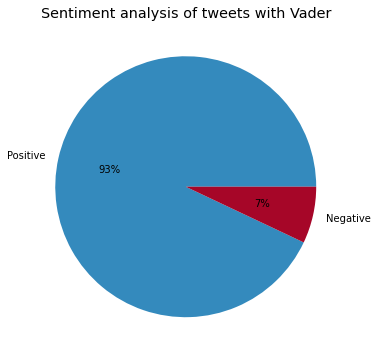

In [50]:
labels = 'Positive', 'Negative'
sentiment = [positive, negative]
plt.figure(figsize=(6, 6))
plt.title('Sentiment analysis of tweets with Vader')
plt.pie(sentiment, labels=labels, autopct='%.0f%%')
plt.show()

In [53]:
analyzer = SentimentIntensityAnalyzer()

positive = 0
negative = 0
neutral = 0
for content in df.content:
    analysis = analyzer.polarity_scores(content)
    
    if analysis['compound'] >= 1/3:
        positive = positive + 1
    elif analysis['compound'] <= -1/3:
        negative = negative + 1
    else:
        neutral = neutral + 1

print("pos:" + str(positive) + "\nneg:" + str(negative) + "\nneu:" + str(neutral))

pos:3153
neg:208
neu:1639


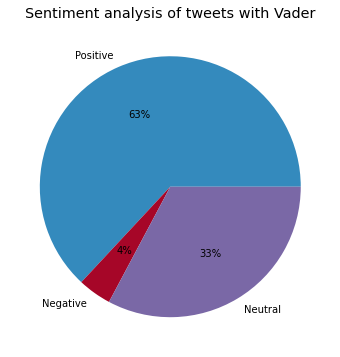

In [54]:
labels = 'Positive', 'Negative', 'Neutral'
sentiment = [positive, negative, neutral]
plt.figure(figsize=(6, 6))
plt.title('Sentiment analysis of tweets with Vader')
plt.pie(sentiment, labels=labels, autopct='%.0f%%')
plt.show()